In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize']= [18,12]
plt.rcParams['font.family'] = ['IPAexGothic']

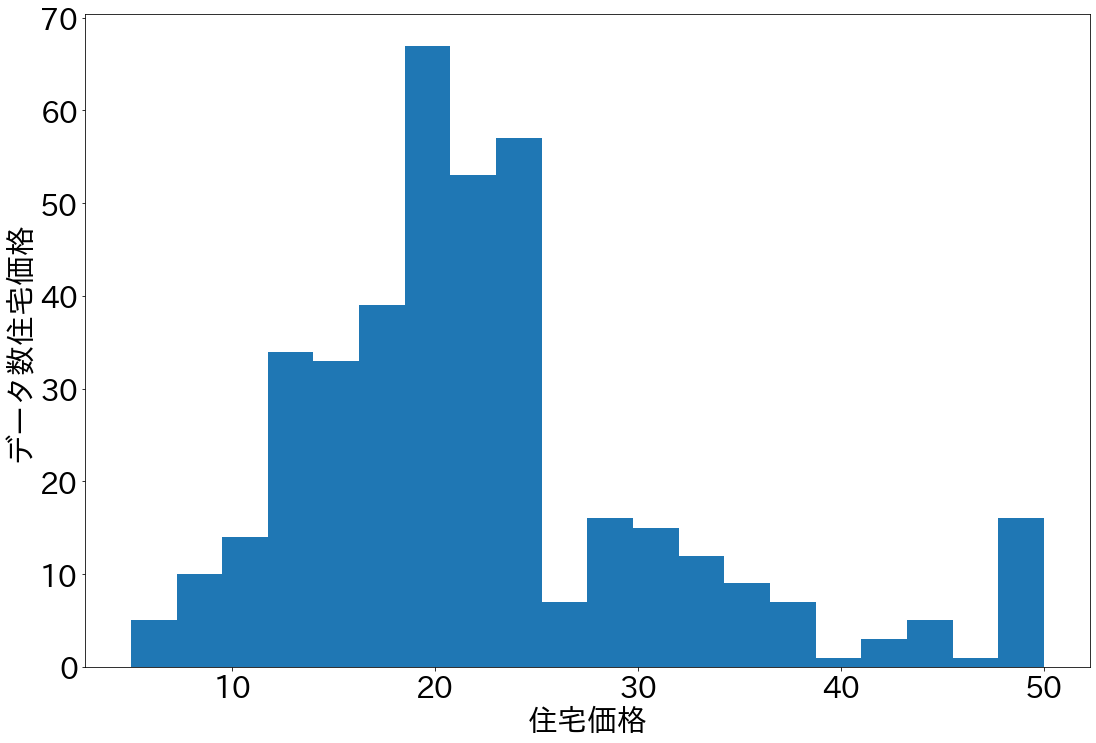

In [5]:
plt.hist(y_train, bins=20)
plt.xlabel("住宅価格")
plt.ylabel("データ数住宅価格")
plt.show()

Text(0, 0.5, '住宅価格')

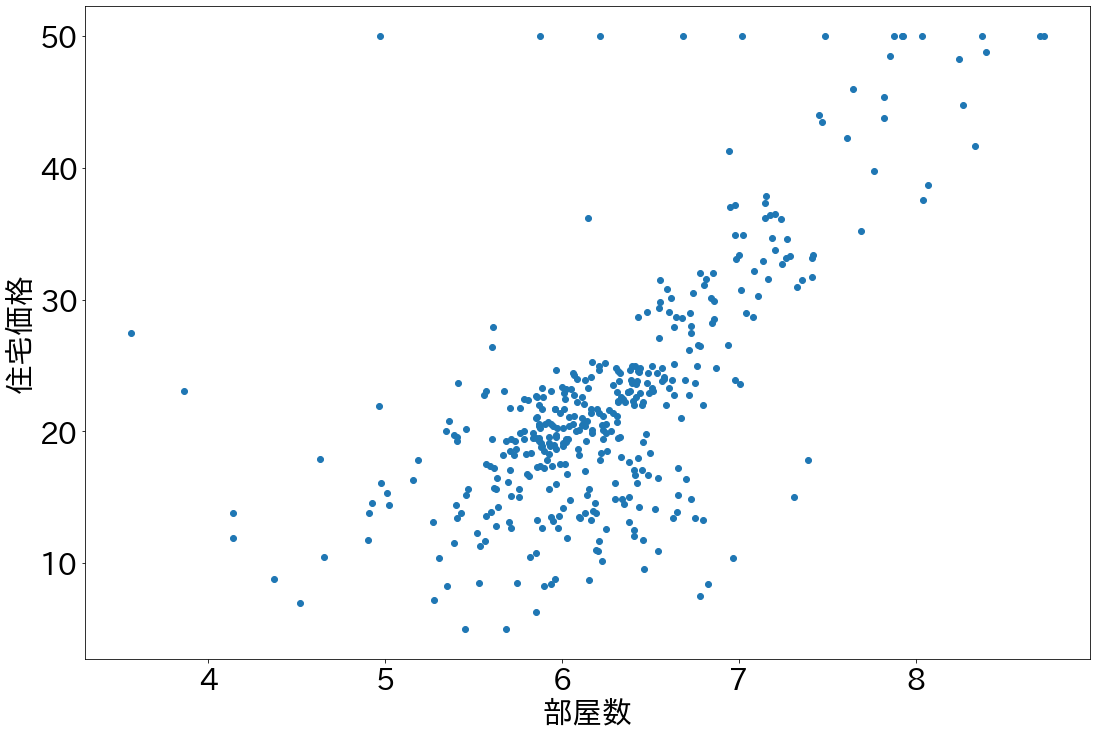

In [6]:
plt.plot(X_train[:, 5], y_train, 'o')
plt.xlabel("部屋数")
plt.ylabel("住宅価格")

In [7]:
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std =y_train.std()

In [8]:
X_train = (X_train - X_train_mean)/X_train_std
y_train = (y_train - y_train_mean)/y_train_std

In [9]:
len(X_train)

404

In [10]:
X_test = (X_test - X_train_mean)/X_train_std
y_test = (y_test - y_train_mean)/y_train_std

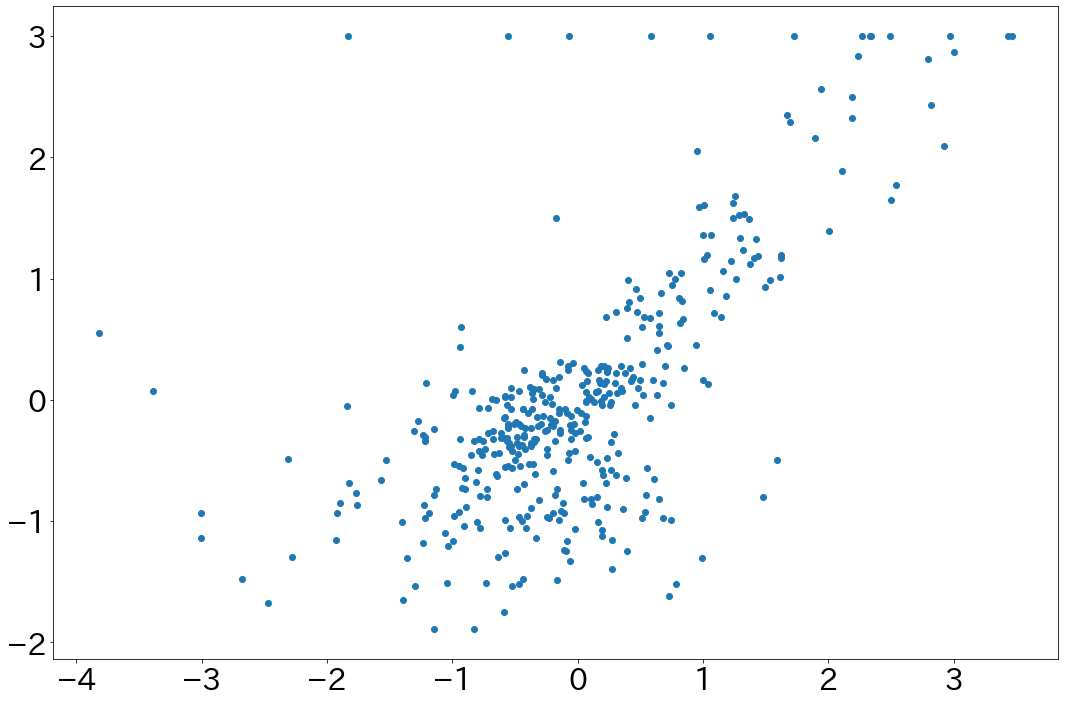

In [11]:
plt.plot(X_train[:, 5], y_train, 'o')

In [13]:
x = tf.placeholder(tf.float32, (None, 13), name='x')
y = tf.placeholder(tf.float32, (None, 1), name= 'y')

In [14]:
w = tf.Variable(tf.random_normal((13,1)))

In [15]:
pred = tf.matmul(x,w)

In [16]:
loss = tf.reduce_mean((y - pred)**2)

In [20]:
opitmizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1)

In [21]:
train_step = opitmizer.minimize(loss)

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict = {
                x: X_train,
                y: y_train.reshape((-1, 1))
            }
        )
        print('step{}, train_loss:{}'.format(step, train_loss))
        
        pred_ = sess.run(
            pred,
            feed_dict={
                x: X_test
            })

step0, train_loss:24.25690269470215
step1, train_loss:4.484335899353027
step2, train_loss:2.8448574542999268
step3, train_loss:2.340085983276367
step4, train_loss:1.9968417882919312
step5, train_loss:1.7333358526229858
step6, train_loss:1.5255353450775146
step7, train_loss:1.3585608005523682
step8, train_loss:1.2220823764801025
step9, train_loss:1.1087844371795654
step10, train_loss:1.013416051864624
step11, train_loss:0.9321588277816772
step12, train_loss:0.8621941208839417
step13, train_loss:0.8014104962348938
step14, train_loss:0.7482009530067444
step15, train_loss:0.7013226747512817
step16, train_loss:0.659798800945282
step17, train_loss:0.6228504776954651
step18, train_loss:0.5898464918136597
step19, train_loss:0.5602690577507019
step20, train_loss:0.533687949180603
step21, train_loss:0.5097416639328003
step22, train_loss:0.4881232976913452
step23, train_loss:0.46857038140296936
step24, train_loss:0.45085662603378296
step25, train_loss:0.43478551506996155
step26, train_loss:0.4201